<a href="https://colab.research.google.com/github/RodriCalle/ComplejidadAlgoritmica/blob/main/9_1_Limited_%26_Iterative_DFS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Limited DFS

In [1]:
import graphviz as gv
import numpy as np
import pandas as pd

In [2]:
def readAdjl(fn, haslabels=False, weighted=False, sep="|"):
  with open(fn) as f:
    labels = None
    if haslabels:
      labels = f.readline().strip().split()
    L = []
    for line in f:
      if weighted:
        L.append([tuple(map(int, p.split(sep))) for p in line.strip().split()])
        # line => "1|3 2|5 4|4" ==> [(1, 3), (2, 5), (4, 4)]
      else: 
        L.append(list(map(int, line.strip().split()))) # "1 3 5" => [1, 3, 5]
        # L.append([int(x) for x in line.strip().split()])
  return L, labels

def adjlShow(L, labels=None, directed=False, weighted=False, path=[], layout="sfdp"):
  g = gv.Digraph("G") if directed else gv.Graph("G")
  g.graph_attr["layout"] = layout
  g.edge_attr["color"] = "gray"
  g.node_attr["color"] = "orangered"
  g.node_attr["width"] = "0.1"
  g.node_attr["height"] = "0.1"
  g.node_attr["fontsize"] = "8"
  g.node_attr["fontcolor"] = "mediumslateblue"
  g.node_attr["fontname"] = "monospace"
  n = len(L)
  for u in range(n):
    g.node(str(u), labels[u] if labels else str(u))
  added = set()
  for v, u in enumerate(path):
    if u != None:
      g.edge(str(u), str(v), dir="forward", penwidth="2", color="orange")
      added.add(f"{u},{v}")
      added.add(f"{v},{u}")
  if weighted:
    for u in range(n):
      for v, w in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v), str(w))
        elif directed:
          g.edge(str(u), str(v), str(w))
  else:
    for u in range(n):
      for v in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v))
        elif directed:
          g.edge(str(u), str(v))
  return g

In [3]:
def ldfs(G, start, limit):
  n = len(G)
  path = [None]*n
  visited = [False] *n

  def _ldfs(G, u,limit):
    if limit > 0:
      visited[u] = True
      for v in G[u]:
        if not visited[v]:
          visited[v] = True
          path[v] = u
          _ldfs(G, v, limit - 1)
          
  _ldfs(G, start, limit)
  return path, visited

In [4]:
%%file 1.adjlist
1 4


2 6 17
7
2
10
0 8
4
8

8 14
16
9 17
15
11 17
15 17
13

Writing 1.adjlist


 0:[1, 4]
 1:[]
 2:[]
 3:[2, 6, 17]
 4:[7]
 5:[2]
 6:[10]
 7:[0, 8]
 8:[4]
 9:[8]
10:[]
11:[8, 14]
12:[16]
13:[9, 17]
14:[15]
15:[11, 17]
16:[15, 17]
17:[13]


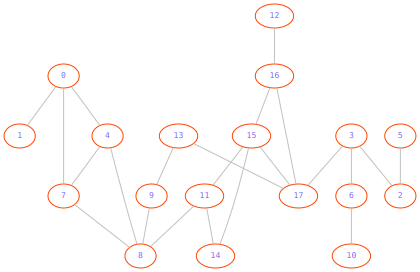

In [5]:
G, _ = readAdjl("1.adjlist")
for i, edges in enumerate(G):
  print(f"{i:2}:{edges}")
adjlShow(G, layout='dot')

[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 16, 12, 16]


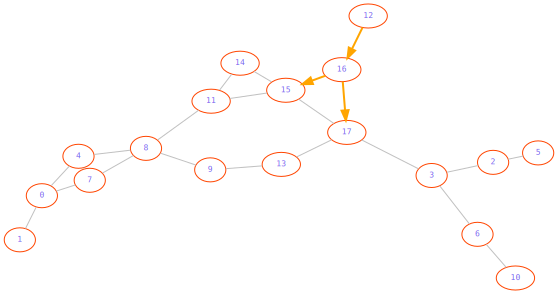

In [6]:
path, visited = ldfs(G, 12, limit=2)
print(path)
adjlShow(G, path =path)

[7, 0, None, None, 8, None, None, 4, 11, 13, None, 15, None, 17, 11, 16, 12, 15]


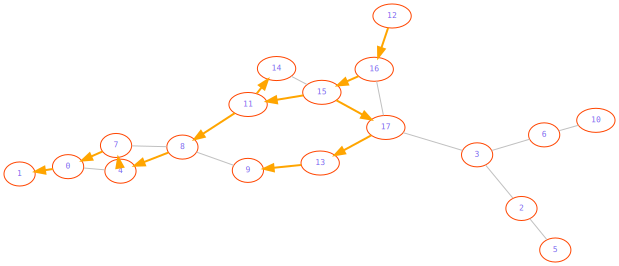

In [7]:
path1, visited = ldfs(G, 12, limit=100)
print(path1)
adjlShow(G, path =path1)

# Iterative DFS

In [8]:
def idfs(G, start, target):
  for limit in range(0, len(G)):
    path, visited = ldfs(G, start, limit)
    if visited[target]:
      break
  return path

[None, None, None, None, 8, None, None, 4, 11, 13, None, 15, None, 17, 11, 16, 12, 15]


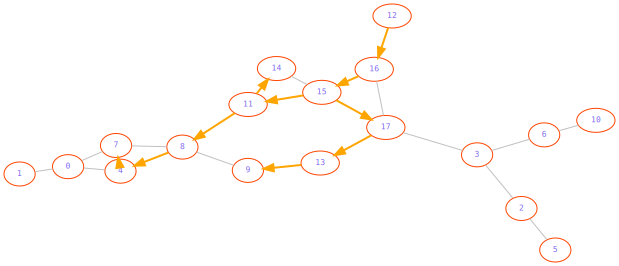

In [9]:
path = idfs(G, start=12, target=7)
print(path)
adjlShow(G, path=path)